###`Q-1:` Write a program to create an empty series.

In [1]:
# code here
import pandas as pd
a=pd.Series([])
print(a)

Series([], dtype: object)


###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [2]:
# code here
s1  = pd.Series([1,2,3])
s2  = pd.Series([1,2,3])
print(s1+s2)
print(s1-s2)
print(s1*s2)
print(s1/s2)

0    2
1    4
2    6
dtype: int64
0    0
1    0
2    0
dtype: int64
0    1
1    4
2    9
dtype: int64
0    1.0
1    1.0
2    1.0
dtype: float64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [3]:
# code here
s1 = pd.Series([2, 4, 6, 8, 10])
s2 = pd.Series([1, 3, 5, 7, 10])
s1>s2

0     True
1     True
2     True
3     True
4    False
dtype: bool

###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [4]:
# code here
series = pd.Series([1,2,'Python', 2.0, True, 100])
print(pd.to_numeric(series, errors ='ignore') )
print(pd.to_numeric(series, errors ='coerce') )


0         1
1         2
2    Python
3       2.0
4      True
5       100
dtype: object
0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64


C:\Users\Adari Shanmukh\AppData\Local\Temp\ipykernel_9236\4054532095.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  print(pd.to_numeric(series, errors ='ignore') )


Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [5]:
# code here
df = pd.read_csv("D:\\PROJECT_PRACTISE_DIRS\\DSML_PRACTISE_FILES\\DATASETS\\batsman.csv")
df.sort_values(by="batsman_run",ascending=False).head(10)

,batter,batsman_run
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


###`Q-7` No of players having runs above 3000

In [6]:
df[df['batsman_run']>3000]

,batter,batsman_run
27,AB de Villiers,5181
46,AM Rahane,4074
60,AT Rayudu,4190
108,CH Gayle,4997
130,DA Warner,5883
169,F du Plessis,3403
174,G Gambhir,4217
251,KA Pollard,3437
256,KD Karthik,4377
263,KL Rahul,3895


###`Q-8` No of players having runs above mean value?

In [7]:
# code here
df1 = df['batsman_run'].apply(lambda x:x>df['batsman_run'].mean())
df[df1]


,batter,batsman_run
15,A Symonds,974
27,AB de Villiers,5181
29,AC Gilchrist,2069
34,AD Mathews,724
36,AD Russell,2039
...,...,...
587,WP Saha,2427
594,Y Venugopal Rao,985
596,YBK Jaiswal,547
597,YK Pathan,3222


Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [8]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv("D:\\PROJECT_PRACTISE_DIRS\\DSML_PRACTISE_FILES\\DATASETS\\items.csv")

# Set 'item_name' as the index
df.set_index('item_name', inplace=True)

def item_price_divider(values):
    try:
        
        values = values.split('$')[1]
        values = float(values) * 86
        values = values
    except Exception as e:
        pass
    return values
# Count the number of NaN values in each column
nan_count = df.isnull().sum()

print(nan_count)
# ii. Item price is given in $, so convert it to rupees without currency symbol.
df['item_price'] = df.astype('str')
df['rupees']=df['item_price'].apply(item_price_divider)
#another way
#df['rupees'] = df['item_price'].apply(lambda x: float(x.split('$')[1]) * 86 if '$' in x else None)
df
#iii. Make data type of newly made series as float.
df['rupees']=pd.to_numeric(df['rupees'], errors ='coerce',downcast='float')
print(df)
#iv. Fill nan with mean of the series
print(df['rupees'].isnull().sum())
df['rupees'].fillna(df['rupees'].mean(),inplace=True)
print(df['rupees'].isnull().sum())


item_price    50
dtype: int64
                                      item_price       rupees
item_name                                                    
Chips and Fresh Tomato Salsa              $2.39    205.539993
Izze                                      $3.39    291.540009
Nantucket Nectar                          $3.39    291.540009
Chips and Tomatillo-Green Chili Salsa     $2.39    205.539993
Chicken Bowl                             $16.98   1460.280029
...                                          ...          ...
Steak Burrito                            $11.75   1010.500000
Steak Burrito                            $11.75   1010.500000
Chicken Salad Bowl                       $11.25    967.500000
Chicken Salad Bowl                        $8.75    752.500000
Chicken Salad Bowl                        $8.75    752.500000

[4622 rows x 2 columns]
50
0


C:\Users\Adari Shanmukh\AppData\Local\Temp\ipykernel_9236\1529325401.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rupees'].fillna(df['rupees'].mean(),inplace=True)


###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



Mean of s1: 1417.96
30th percentile of s1: 1206.5
6th percentile of s1: 1046.76
Histogram: [ 0  0 33 17]
Bin edges: [   0  500 1000 1500 2000]


(array([ 0.,  0., 33., 17.]),
 array([   0.,  500., 1000., 1500., 2000.]),
 <BarContainer object of 4 artists>)

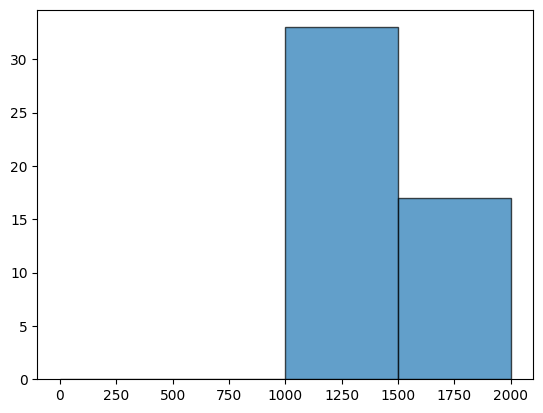

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Create a series of 50 random integers between 1000 and 2000
s1 = pd.Series(np.random.randint(1000, 2000, 50))

# Print the mean of the series
print("Mean of s1:", s1.mean())

# Print the 30th percentile of the series
print("30th percentile of s1:", np.percentile(s1, 30))

# Print the 6th percentile of the series
print("6th percentile of s1:", np.percentile(s1, 6))

# Calculate and print the histogram of s1 with bins between 0-1000 and 1000-2000
hist, bin_edges = np.histogram(s1, bins=[0, 500,1000,1500,2000])
print("Histogram:", hist)
print("Bin edges:", bin_edges)

plt.hist(s1, bins=[0, 500,1000,1500,2000], edgecolor='black', alpha=0.7)
